In [1]:
!pip install -q roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 35.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 73.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:

In [2]:
# Install tree if you haven't already
!apt-get install -y tree

# Display the directory structure, but only 2 levels deep for a clean view
# Replace 'weapon-detection-yolov8' with your dataset's folder name
!tree -L 2 /kaggle/input/weapons-all-types

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (346 kB/s)
Selecting previously unselected package tree.
(Reading database ... 128663 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
/kaggle/input/weapons-all-types
├── data.yaml
├── README.dataset.txt
├── README.roboflow.txt
├── train
│   ├── images
│   └── labels
└── valid
    ├── images
    └── labels

6 directories, 3 files


In [5]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model (yolov8n is small and fast)
model = YOLO('yolov8n.pt')

# Train the model on your dataset
results = model.train(
   data='/kaggle/input/weapons-all-types/data.yaml', # Correct path to your data file
   epochs=25,                                      # Increased epochs for better results
   imgsz=640,                                      # Standard image size
   project='weapon-detection',                       # Project folder to save results
   name='weapons_all_types_run_1'                  # Name for this specific training run
)

Ultralytics 8.3.190 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/weapons-all-types/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=weapons_all_types_run_13, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        900       1121      0.873       0.83      0.895      0.582
                   Gun        300        437       0.86      0.803      0.891      0.565
                 Knife        303        337      0.839      0.834      0.863      0.489
                Pistol        306        347       0.92      0.853      0.931      0.693
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to weapon-detection/weapons_all_types_run_13



0: 640x640 4 Guns, 5.4ms
1: 640x640 2 Knifes, 5.4ms
2: 640x640 1 Pistol, 5.4ms
3: 640x640 2 Pistols, 5.4ms
Speed: 1.5ms preprocess, 5.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
Displaying 4 random images from the training set with their predictions...
------------------------------


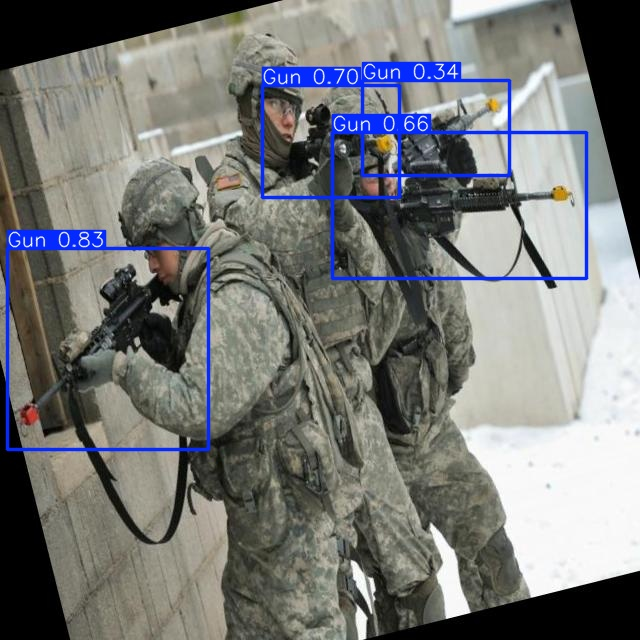

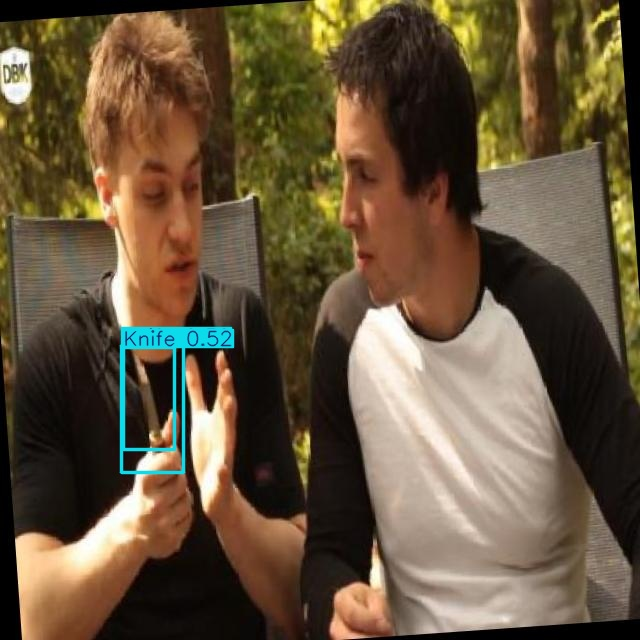

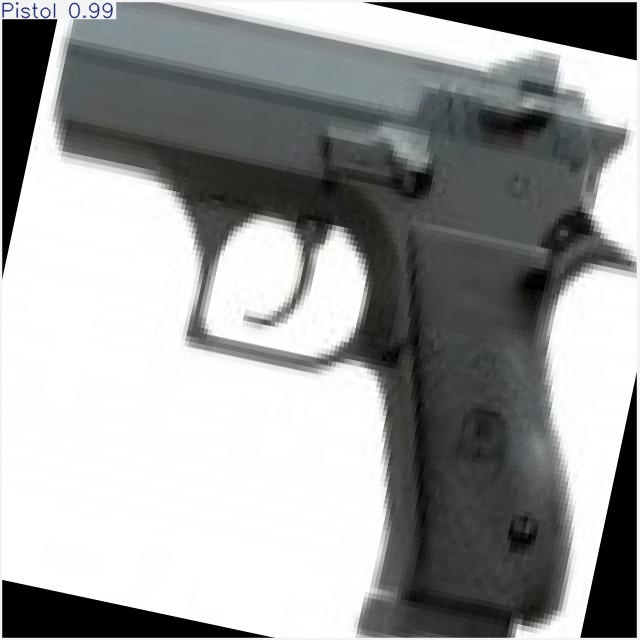

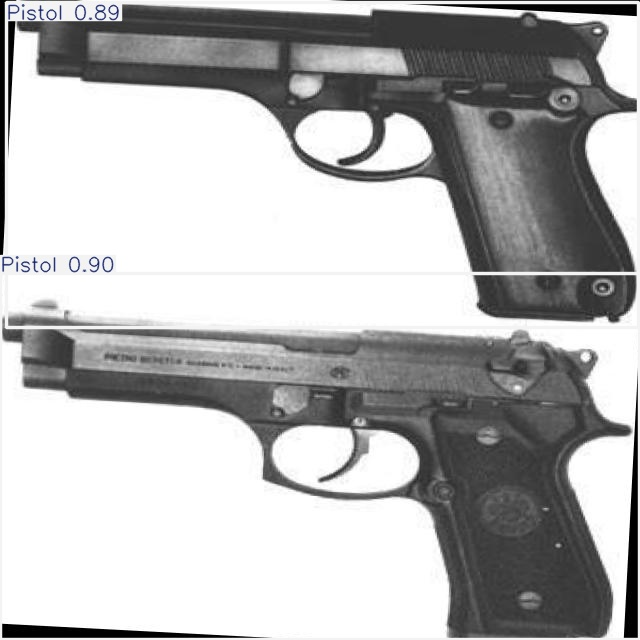

In [8]:
from ultralytics import YOLO
from PIL import Image
import os
import random

# --- CONFIGURATION ---
# The path to your trained model
model_path = '/kaggle/working/weapon-detection/weapons_all_types_run_13/weights/best.pt'

# The path to your training images
image_dir = '/kaggle/input/weapons-all-types/train/images/'

# Number of random images to show
num_images = 4
# ---------------------

# Load your custom-trained model
model = YOLO(model_path)

# Get a list of all image files in the training directory
all_images = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Randomly select a few images from the list
images_to_test = random.sample(all_images, num_images)

# Run prediction on the selected images
results = model.predict(source=images_to_test, save=True)

# --- CORRECTED DISPLAY LOOP ---
print(f"Displaying {num_images} random images from the training set with their predictions...")
print("-" * 30)

for r in results:
    # THE FIX: Construct the full path to the result image file.
    # r.path contains the original image path, so we use its filename.
    original_filename = os.path.basename(r.path)
    result_image_path = os.path.join(r.save_dir, original_filename)
    
    # Display each result image
    display(Image.open(result_image_path))

In [ ]:
from ultralytics import YOLO
from PIL import Image
from google.colab import files
import os

# --- CONFIGURATION ---
# This is the exact path to your best trained model from the last run.
model_path = '/kaggle/working/weapon-detection/weapons_all_types_run_13/weights/best.pt'
# ---------------------

# Load your custom-trained model
try:
    model = YOLO(model_path)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    # Fallback in case the path is slightly different, you might need to check the folder structure
    # !ls -R /kaggle/working/weapon-detection/

# Create an upload button
print("\nPlease upload an image to test:")
uploaded = files.upload()

# Process the uploaded image
if uploaded:
    # Get the filename
    image_filename = next(iter(uploaded))
    print(f"\nProcessing '{image_filename}'...")

    # Run inference
    # The `save=True` argument will store the output image
    results = model.predict(source=image_filename, save=True)

    # Find the latest prediction folder to display the result
    predict_dirs = sorted([d for d in os.listdir('/kaggle/working/runs/detect/') if d.startswith('predict')])
    latest_predict_dir = os.path.join('/kaggle/working/runs/detect/', predict_dirs[-1])
    result_image_path = os.path.join(latest_predict_dir, image_filename)


    # Display the result image
    print(f"Displaying result from: {result_image_path}")
    display(Image.open(result_image_path))

else:
    print("\nNo image was uploaded.")